In [169]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [170]:
import numpy as np
import pandas as pd

In [171]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [172]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [173]:
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [174]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [175]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [176]:
# Save references to each table
measurement = base.classes.measurement 
station = base.classes.station

In [177]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

# Exploratory Climate Analysis

('2017-08-23')

datetime.date(2016, 8, 23)

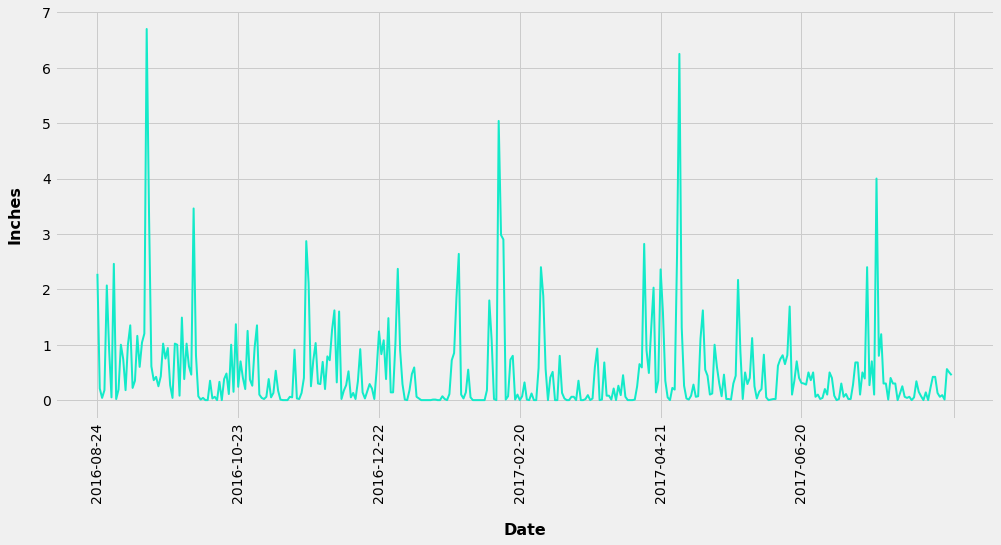

In [245]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
ld = (session.query(measurement.date).order_by(measurement.date.desc()).first())
display(ld)
# Calculate the date 1 year ago from the last data point in the database
oya = dt.date(2017, 8, 23) - dt.timedelta(days=365)
display(oya)
# Perform a query to retrieve the data and precipitation scores
yrp =(session.query(measurement.date,func.max(measurement.prcp))
                  .filter(func.strftime('%Y-%m-%d',measurement.date) > oya)
                  .group_by(measurement.date)
                  .all())

# Save the query results as a Pandas DataFrame and set the index to the date column
prp_df = pd.DataFrame(yrp, columns=['date','prp'])
prp_df.set_index('date',inplace=True)
prp_df.head()
# Sort the dataframe by date
prp_df.sort_values('date')
# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams['figure.figsize']=(15,7)
prp_df.plot(linewidth=2,alpha=1,rot=90, 
             xticks=(0,60,120,180,240,300,365),
             color='xkcd:aqua')
plt.yticks(size=14)
plt.xticks(fontsize=14)
plt.legend('',frameon=False)
plt.xlabel('Date',fontsize=16,color='black',labelpad=20,weight="bold",)
plt.ylabel('Inches',fontsize=16,color='black',labelpad=20,weight="bold",)

plt.show()

In [205]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yrps = (session.query(measurement.date, measurement.prcp)
              .filter(measurement.date > oya)
              .all())
yrps_df = pd.DataFrame(yrps, columns = ['date', 'prcp'])
yrps_df.dropna()
yrps_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [207]:
# Design a query to show how many stations are available in this dataset?
ts = session.query(station).count()
display(ts)

9

In [208]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sa = (session.query(measurement.station,func.count(measurement.station))
             .group_by(measurement.station)
             .order_by(func.count(measurement.station).desc())
             .all())
sa

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [214]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
tobs = [measurement.station,func.min(measurement.tobs),func.max(measurement.tobs),
      func.avg(measurement.tobs)]
mas = (session.query(*tobs)
              .filter(measurement.station == 'USC00519281').all())
mas_df = pd.DataFrame(mas, columns = ['Station','Min_Temp','Max_Temp','Ave_Temp'])
mas_df.set_index('Station', inplace=True)
mas_df

,Min_Temp,Max_Temp,Ave_Temp
Station,,,
USC00519281,54.0,85.0,71.663781


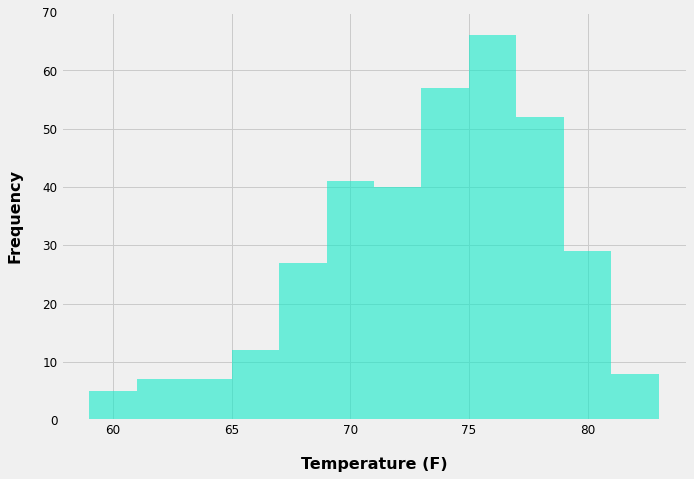

In [244]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
ytobs = (session.query(measurement.date,(measurement.tobs))
                  .filter(func.strftime(measurement.date) > oya)
                  .filter(measurement.station == 'USC00519281')
                  .all())
ytobs_df = pd.DataFrame(ytobs)
ytobs_df.set_index('date', inplace = True)

plt.rcParams['figure.figsize']=(10,7)
plt.hist(ytobs_df['tobs'],bins=12,alpha=0.6,
         linewidth=1,color='xkcd:aqua')
plt.xlabel('Temperature (F)',fontsize=16,color='black',labelpad=20, weight='bold')
plt.ylabel('Frequency',fontsize=16,color='black',labelpad=20, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

plt.show()